# [9660] Decision Tree 1
Data file:
* sklearn : iris

In [48]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/05/24 01:19:26


### Mount your Google Drive
Execute the cell below and carefully follow the instructions

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
# The location below is your Google Drive
%cd "/content/gdrive/My Drive/CIS9660"


/content/gdrive/My Drive/CIS9660


### Import libraries

In [51]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

### Load data

In [52]:
iris = load_iris()

In [53]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.shape

(150, 5)

### Explore data

In [54]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [55]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Separate independent and dependent variables

In [59]:
# Setup independent and dependent variables
X = df.drop(['species'], axis = 1)
y = df['species']

### Set global variable

In [60]:
global RANDOM_STATE
RANDOM_STATE=42

### Split data into training and test sets

In [61]:
# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=RANDOM_STATE)

### Train model

In [62]:
# Fit a DecisionTreeClassifier model
tree_1 = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [63]:
tree_1.fit(X_train, y_train)
tree_1.get_depth()

5

### Evaluate model

In [64]:
# Predict using the test set
y_pred = tree_1.predict(X_test)

In [65]:
# Print model accuracy score
accuracy_score_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy = {round((accuracy_score_1 * 100), 4)}%")

Accuracy = 93.3333%


In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
tree_1.feature_importances_

array([0.00625   , 0.02916667, 0.5585683 , 0.40601504])

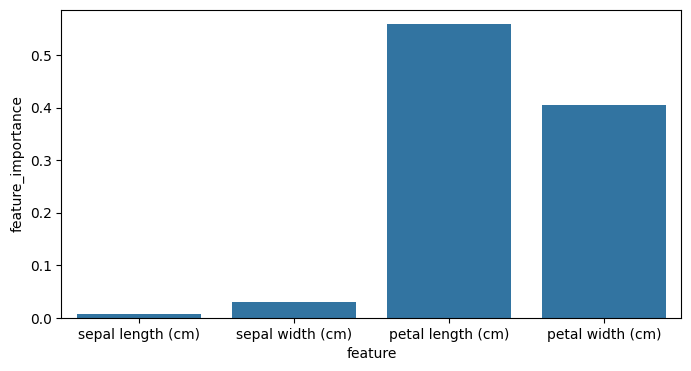

In [68]:
# Create new dataframe to display feature importances
df2 = pd.DataFrame(zip(iris.feature_names, tree_1.feature_importances_),
                   columns=['feature', 'feature_importance'])

fig = plt.figure(figsize = (8, 4))
sns.barplot(data=df2, x='feature', y='feature_importance')
plt.xticks(rotation = 0)
plt.show()

### Visualize model output

In [69]:
# Visualize decision tree. Create dot file.
export_graphviz(
    tree_1,
    out_file = 'images/DT_1.dot',
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True,
    rounded = True
)

In [70]:
# Linux command to draw a directed graph from a representation of decision tree (dot file).
# Run this command to convert the .dot file to a .png file
!dot -Tpng images/DT_1.dot -o images/DT_1.png



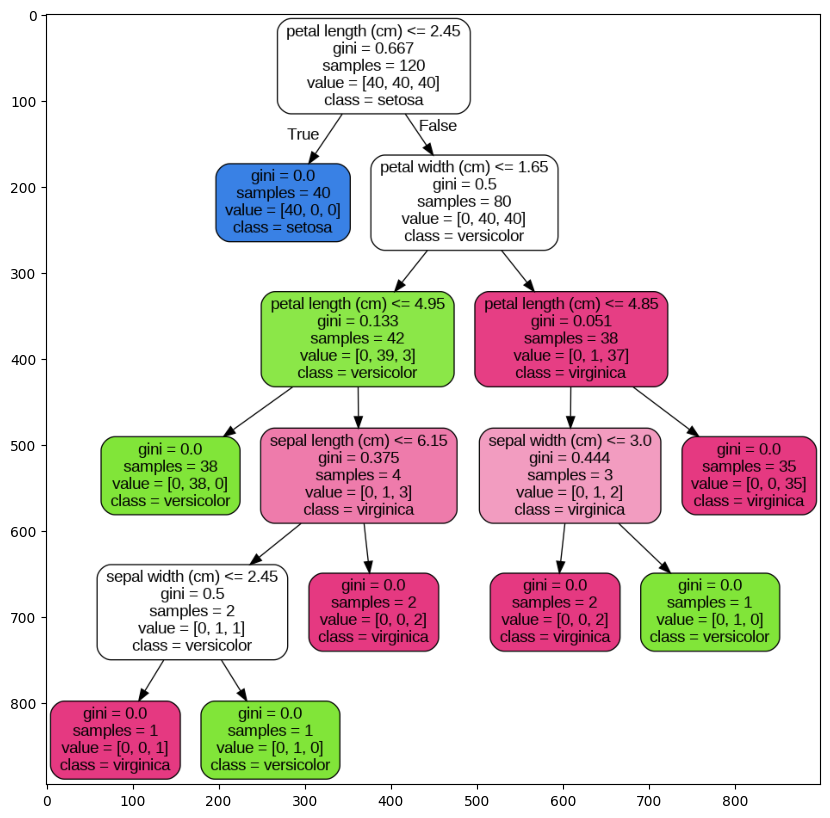

In [71]:
# Display directed graph
img = cv2.imread('images/DT_1.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

### Train model with different hyperparameters

In [72]:
# Fit a DecisionTreeClassifier model with a different max_depth value
tree_2 = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_split=3, random_state=RANDOM_STATE)
tree_2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [73]:
tree_2.fit(X_train, y_train)
tree_2.get_depth()

3

### Evaluate model

In [74]:
# Predict using the test set
y_pred = tree_2.predict(X_test)

In [75]:
# Print model accuracy score
accuracy_score_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy = {round((accuracy_score_1 * 100), 4)}%")

Accuracy = 96.6667%


In [76]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [77]:
tree_2.feature_importances_

array([0.        , 0.        , 0.68654624, 0.31345376])

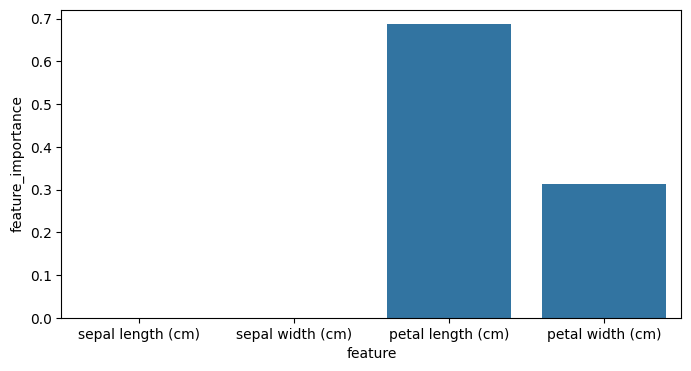

In [78]:
# Create new dataframe to display feature importances
df2 = pd.DataFrame(zip(iris.feature_names, tree_2.feature_importances_),
                   columns=['feature', 'feature_importance'])

fig = plt.figure(figsize = (8, 4))
sns.barplot(data=df2, x='feature', y='feature_importance')
plt.xticks(rotation = 0)
plt.show()

### Visualize model output

In [79]:
# Visualize decision tree. Create dot file.
export_graphviz(
            tree_2,
            out_file = 'images/DT_2.dot',
            feature_names = iris.feature_names,
            class_names = iris.target_names,
            filled = True,
            rounded = True)

In [80]:
# Linux command to draw a directed graph from a representation of decision tree (dot file).
! dot -Tpng images/DT_2.dot -o images/DT_2.png

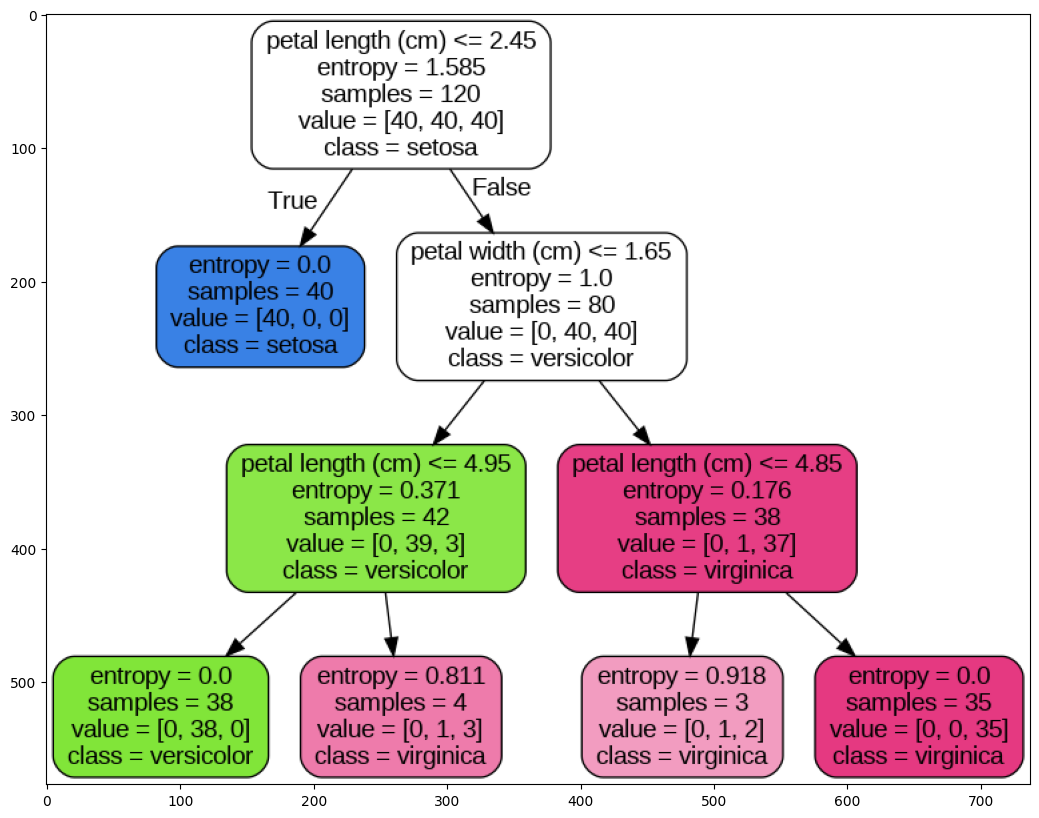

In [81]:
# Display directed graph
img = cv2.imread('images/DT_2.png')
plt.figure(figsize = (14, 10))
plt.imshow(img)
plt.show()